In [1]:
import xarray as xr
import numpy as np
#import pandas as pd
import os
import glob
import random
import pyproj as proj
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn import cluster
import wpca
import pandas as pd

from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy as cr
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
from Config2 import *
from All_functions_ML import *

# Load data

In [3]:
CENTROID, LABELS_TEST, LABELS_VALID, LATS_TEST, LATS_VALID, LONS_TEST, LONS_VALID, LONS_TRAIN, LATS_TRAIN, \
    X_REDUCED_TEST, X_REDUCED_VALID, TEMPS_TEST, TEMPS_TRAIN, TEMPS_VALID, SALS_TEST, SALS_TRAIN, SALS_VALID, X_centers_train =\
load_data_test_train_valid(path_save_clustering, ntest, Dataset_path, length_days, perctest, perctrain, start_lon)

In [4]:
Dates_all,  Perc_labels_all = get_labels_time_series(path_save_clustering, init_year,final_year, n_clusters,  length_days, files, start_lon)

Year 1993
Year 1994
Year 1995
Year 1996
Year 1997
Year 1998
Year 1999
Year 2000
Year 2001
Year 2002
Year 2003
Year 2004
Year 2005
Year 2006
Year 2007
Year 2008
Year 2009
Year 2010
Year 2011
Year 2012
Year 2013


# def figures

In [5]:
def plot_density_arctic(LABELS_TEST, LONS_TEST, LATS_TEST,n_clusters = n_clusters,  name = 'toto'):
    lims = [-200, -90, 65, 90]
    ncs = np.arange(n_clusters)
    Liste_hist  = []
    f = plt.figure(figsize = (20, 15))   

    for nc in ncs:
        print(nc)

        cf = 'k'

        lons_pdf = [] ; lats_pdf = [] ; count=0
        for n in range(len(LABELS_TEST)):
            if LABELS_TEST[n]==nc :
                lons_pdf.extend(LONS_TEST[n,:][~np.isnan(LONS_TEST[n,:])]) ; lats_pdf.extend(LATS_TEST[n,:][~np.isnan(LATS_TEST[n,:])])
                count += 1

        # Initalize the histogram
        lon1 = 0 ; lon2 = 360 ; lat1 = 65 ; lat2 = 90
        x = np.arange(lon1,lon2,1./12.)
        y = np.arange(lat1,lat2,1./12.)

        # Calculate the histogram
        hist, xe, ye = np.histogram2d(lons_pdf, lats_pdf, bins=(x,y))
        hist[hist==0] = np.nan

        # plot
        ax = f.add_subplot(np.max(LABELS_TEST)//6+1,6,nc+1, projection = ccrs.NorthPolarStereo())
        ax.coastlines(color='silver')
        ax.gridlines(zorder=-1)
        ax.set_extent(lims,  crs=ccrs.PlateCarree())
        ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')

        im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=1.0,vmax=50), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
        ##im = ax.pcolor(x, y, hist.T, norm=colors.LogNorm(vmin=2.0,vmax=np.nanpercentile(hist,99)), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
        Liste_hist.append(hist.T)
        ax.text(0.03, 0.05, '#'+str(nc), transform=ax.transAxes, fontsize=16)
        ax.text(0.8, 0.87, str(count), transform=ax.transAxes, fontsize=16)
        #plt.contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)

        if nc==0:
            cbaxes = inset_axes(ax, width="50%", height="5%", loc=3) 
            cbar = plt.colorbar(im, cax=cbaxes, ticks=[0.,10,50], orientation='horizontal')

    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    if name != 'toto':
        f.savefig('./Figures/'+name+'.png')
        plt.close()
    return Liste_hist

In [6]:
def plot_one_cluster_Arctic(num_cluster,f, ax, labels, lats, lons, name_run, lats_train, lons_train, centroids, name):
    
    # Load bathymetry
    # bathy = xr.open_dataset('/storage3/shared/Glorys12/GLO-MFC_001_030_mask_bathy.nc')
    # latb = bathy.latitude ; lonb = bathy.longitude
    # bathy = bathy.deptho
                            
    # one figure per cluster
    listlabels = list(set(labels))
    
    ax.coastlines(color='silver')
    ax.gridlines(zorder=-1)
    ax.set_extent([-200, -90, 65, 90],  crs=ccrs.PlateCarree())
    ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')        
    count = 0
    for n in range(labels.shape[0]):
        if labels[n]==num_cluster :
            count+=1
            try:
                ax.plot(lons[n,:], lats[n,:], transform = ccrs.PlateCarree(), c= cm.nipy_spectral(float(num_cluster) / len(listlabels)), zorder=1)
            except:
                print('num_cluster', num_cluster)
                print('n', n)
                print('labels.shape', labels.shape)
                print('lons.shape', lons.shape)
                print('lats.shape', lats.shape)
                
    ax.plot(lons_train[int(centroids[num_cluster]),:], lats_train[int(centroids[num_cluster]),:], transform = ccrs.PlateCarree(), c='k')
    ax.text(0.03, 0.05, '#'+str(num_cluster), transform=ax.transAxes, fontsize=16)
    ax.text(0.8, 0.87, str(count), transform=ax.transAxes, fontsize=16)

    return ax,f

# Plot Figs

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


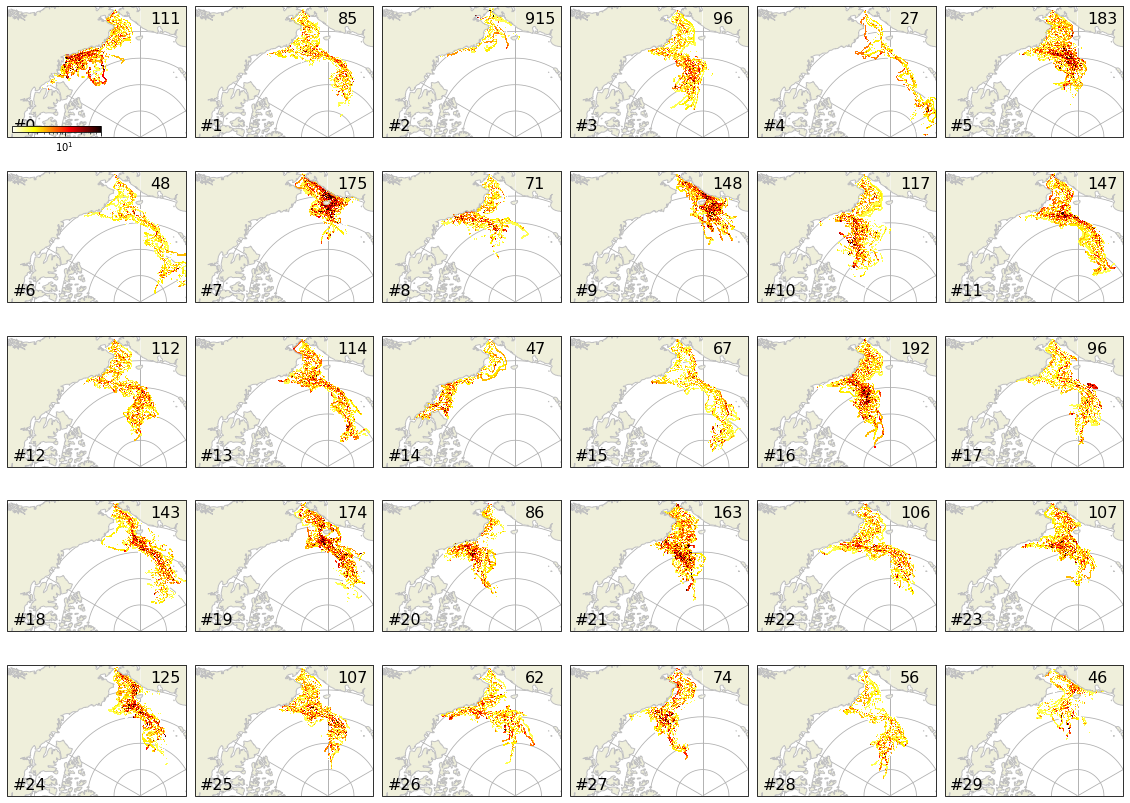

In [7]:
Liste_h = plot_density_arctic(LABELS_TEST, LONS_TEST, LATS_TEST)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


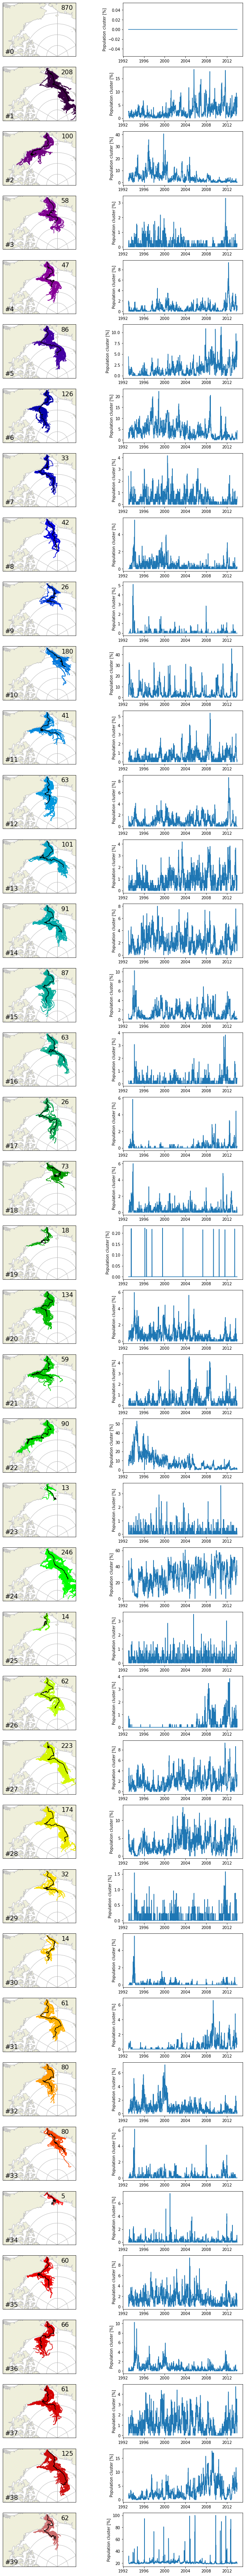

In [20]:
f = plt.figure(figsize = (12,4*30))
for num in range(n_clusters):
    print(num)
    ax = f.add_subplot(n_clusters,2,2*num+2)
    ax.plot(Dates_all, Perc_labels_all[:,num])
    ax.set_ylabel('Population cluster [%]')
    ax = f.add_subplot(n_clusters,2,2*num+1,projection = ccrs.NorthPolarStereo())
    ax, f = plot_one_cluster_Arctic(num,f, ax, LABELS_TEST, LATS_TEST, LONS_TEST, ntest, LATS_TRAIN, LONS_TRAIN, CENTROID, 'valid')

# All Figures

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


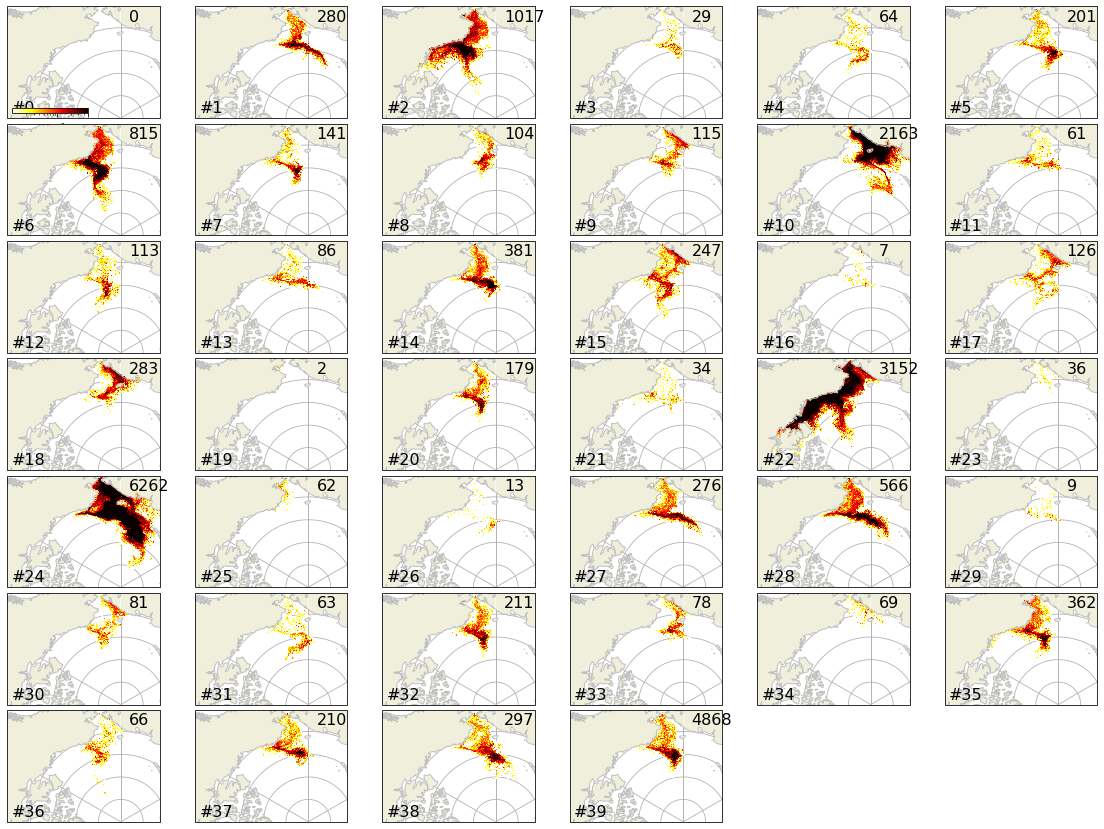

In [21]:
for yr in range(1993, 1994):#2014):
    print('year: ', yr)
    lats_all, lons_all, temps_all, sals_all, date_all, labels = load_data_year(path_save_clustering, yr, length_days, files, start_lon)
    Liste_h = plot_density_arctic(labels, lons_all, lats_all, name = 'toto')

# Garbage

In [17]:
Lab_labels = sorted(glob.glob(path_save_clustering+'/ClassifiedData/labels*'))
Lat_labels = sorted(glob.glob(path_save_clustering+'/ClassifiedData/lats*'))
Lons_labels = sorted(glob.glob(path_save_clustering+'/ClassifiedData/lons*'))
Tim_labels = sorted(glob.glob(path_save_clustering+'/ClassifiedData/time*'))

In [18]:
# -----------------------------------------------------------------------------
L1 = [24]#ACC
L2 = [ 0, 3, 9, 12, 14, 19,  21, 28, 30,36, 32, 5]#Contourne BC
L3 = [15, 29]#eurasie
L4 = [2, 25,  6, 7, 8, 10, 11, 13, 18, 27, 31,  33, 34, 35, 37, 38, 4]# Entre CB
L5 = [16, 26] # Shelf
L6 = [1, 13, 17, 22]#C-short
Groupes = [L1,L2,L3,L4, L6]#,L5,L6]
Names = ['ACC', 'Contourne BC', 'Eurasie', 'Entre CB', 'Autre']
#------------------------------------------------------------------------------


In [21]:
c = 0
for k in range(0, len(Lab_labels)):
    Labs = np.load(Lab_labels[k], allow_pickle = True)
    c+= len(Labs)
print(c)

487363


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
groupe,  0
groupe,  1
groupe,  2
groupe,  3


IndexError: index 38 is out of bounds for axis 0 with size 38

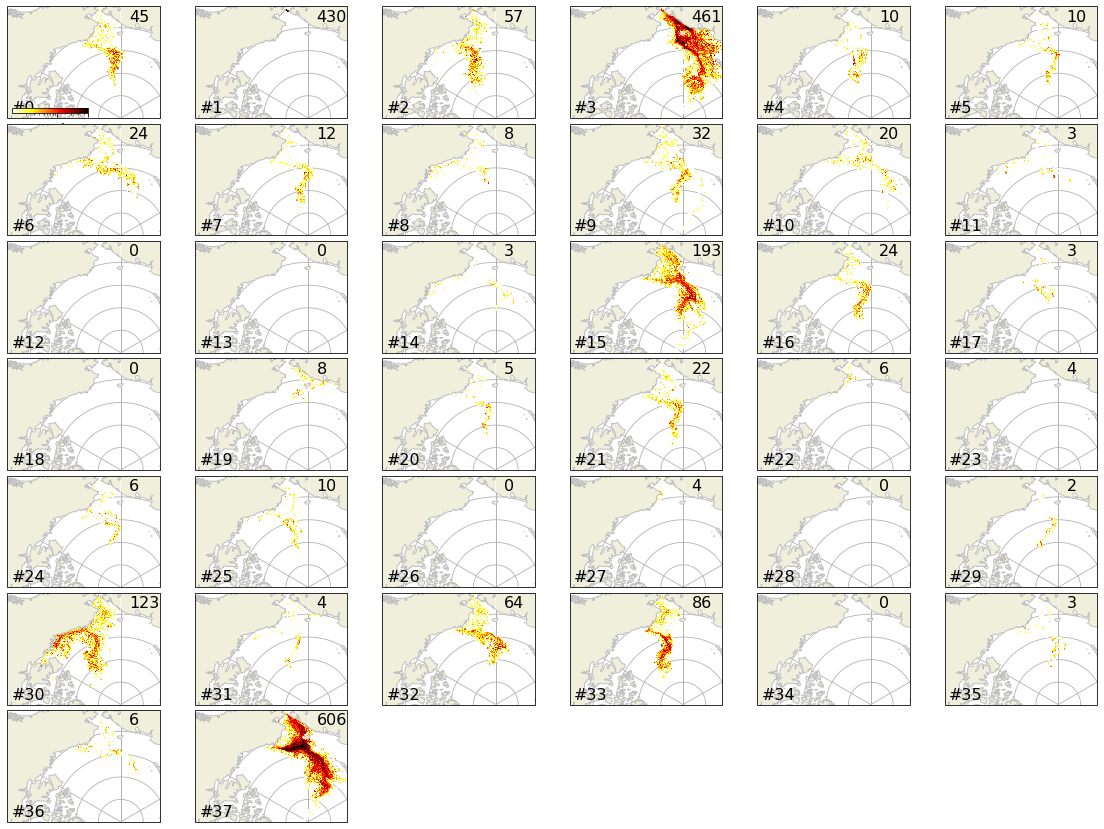

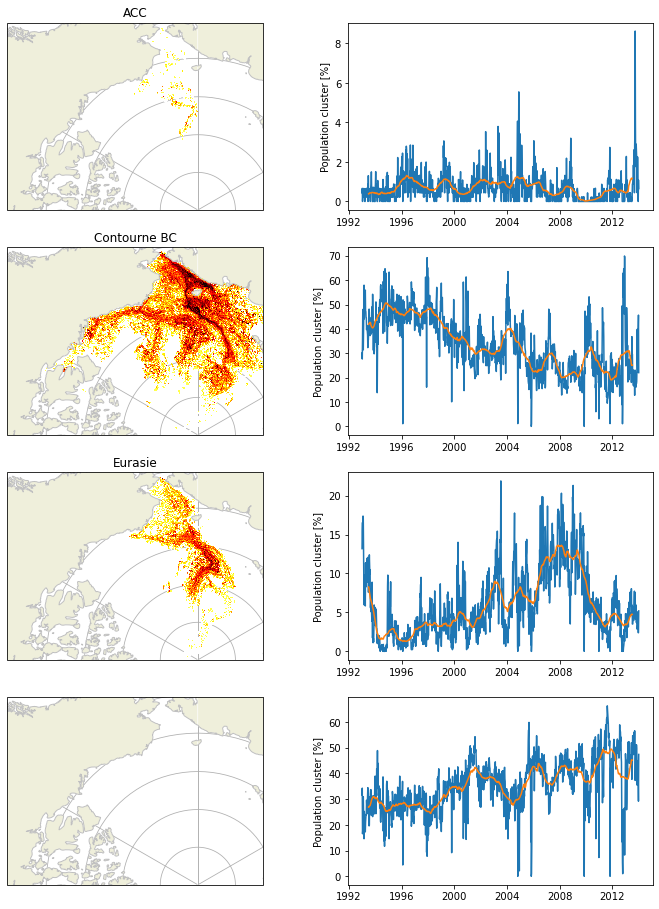

In [19]:
for k in range(10,11):#, len(Lab_labels)):
    Labs = np.load(Lab_labels[k], allow_pickle = True)
    Lons = np.load(Lons_labels[k], allow_pickle = True)
    Lats = np.load(Lat_labels[k], allow_pickle = True)
    Times = np.load(Tim_labels[k], allow_pickle = True)
    Y = [pd.Timestamp(Times[x]).year for x in range(len(Times))]
    M = np.array([pd.Timestamp(Times[x]).month for x in range(len(Times))])
    for m in range(1, 13):
        Labs_m = Labs[np.where(M==m)[0]]
        Lons_m = Lons[np.where(M==m)[0]]
        Lats_m = Lats[np.where(M==m)[0]]
       
        Liste_h = plot_density_arctic(Labs_m, Lons_m, Lats_m)# 'Group_year_'+str(Y[0])+'_month_'+str(m))
        f = plt.figure(figsize = (12,len(Groupes)*4))
        for i in range(len(Groupes)):
            print('groupe, ', i)
            ax = f.add_subplot(len(Groupes),2,2*i+2)
            ax.plot(Dates_all, np.sum(Perc_labels_all[:,Groupes[i]], axis = 1))
            tm0,rm = running_mean(Dates_all, np.sum(Perc_labels_all[:,Groupes[i]], axis = 1), 53)
            ax.plot(tm0, rm)
            ax.set_ylabel('Population cluster [%]')
            ax = f.add_subplot(len(Groupes),2,2*i+1,projection  = ccrs.NorthPolarStereo())
            # Initalize the histogram
            lon1 = -360 ; lon2 = 0 ; lat1 = 65 ; lat2 = 90
            x = np.arange(lon1,lon2,1./12.)
            y = np.arange(lat1,lat2,1./12.)
            lims = [-200, -90, 65, 90]
            ax.coastlines(color='silver')
            ax.gridlines(zorder=-1)
            ax.set_extent(lims,  crs=ccrs.PlateCarree())
            ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')
            A = np.nansum(np.array(Liste_h)[Groupes[i],:,:], axis = 0)
            im = ax.pcolormesh(x, y, A, norm=colors.LogNorm(vmin=1.0,vmax=50), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
            ax.set_title(Names[i])
        #f.savefig('./Figures/Group_year_'+str(Y[0])+'_month_'+str(m)+'.png')
        #plt.close()

0
1
2
3
4


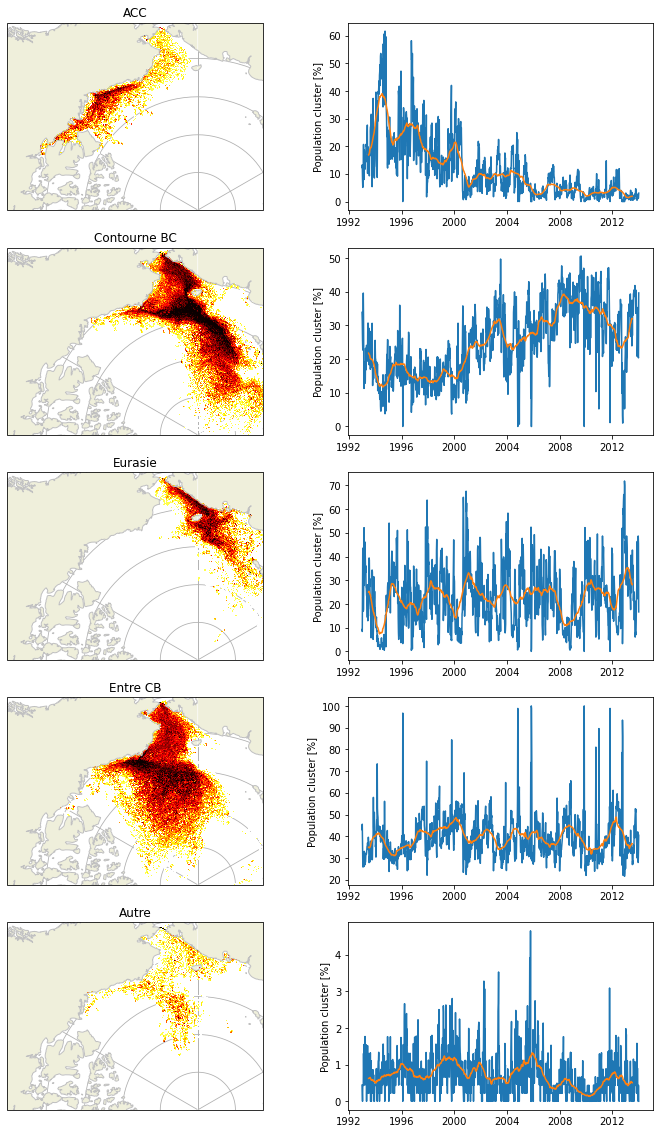

In [75]:

f = plt.figure(figsize = (12,len(Groupes)*4))
for i in range(len(Groupes)):
    print(i)
    ax = f.add_subplot(len(Groupes),2,2*i+2)
    ax.plot(Dates_all, np.sum(Perc_labels_all[:,Groupes[i]], axis = 1))
    tm0,rm = running_mean(Dates_all, np.sum(Perc_labels_all[:,Groupes[i]], axis = 1), 53)
    ax.plot(tm0, rm)
    ax.set_ylabel('Population cluster [%]')
    ax = f.add_subplot(len(Groupes),2,2*i+1,projection  = ccrs.NorthPolarStereo())
    # Initalize the histogram
    lon1 = -360 ; lon2 = 0 ; lat1 = 65 ; lat2 = 90
    x = np.arange(lon1,lon2,1./12.)
    y = np.arange(lat1,lat2,1./12.)
    lims = [-200, -90, 65, 90]
    ax.coastlines(color='silver')
    ax.gridlines(zorder=-1)
    ax.set_extent(lims,  crs=ccrs.PlateCarree())
    ax.add_feature(cr.feature.LAND, linewidth=0.5, edgecolor='white')
    A = np.nansum(np.array(Liste_h)[Groupes[i],:,:], axis = 0)
    im = ax.pcolormesh(x, y, A, norm=colors.LogNorm(vmin=1.0,vmax=50), transform = ccrs.PlateCarree(), cmap=get_cmap('hot_r'))
    ax.set_title(Names[i])
    

In [ ]:
[Dates_all[i] for i in np.where(Perc_labels_all[:,37]==100)[0]]

#ds = xr.open_dataset('/storage/nplanat/Glorys12_OP_journalier/ADV_j_600_2005.nc')
#ds.time[:, 0][21120:21600]
f = plt.figure()
ax = f.add_subplot(1,1,1, projection = ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines(zorder=-1)
for x in range(21120,21600):
    ax.plot(ds.lon[x, :], ds.lat[x,:], transform =  ccrs.PlateCarree())
#lims = [-200, -90, 65, 90]
#ax.set_extent(lims,  crs=ccrs.PlateCarree())